# Kelompok 6

- Mohammad Nizar Riswanda (21083010015)
- Meisya Vira Amelia (21083010018)
- Rheinka Elyana Suprapto (21083010021)
- Edina Alana Nabila (21083010022)

# Import Library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
import eli5
from eli5.sklearn import PermutationImportance
import warnings
import warnings

plt.rcParams['figure.figsize'] = [4, 4]

# Import Dataset

In [2]:
df=pd.read_csv('satisfaction.csv')
df

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,119211,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,97768,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,...,1,3,2,3,3,1,2,1,174,172.0
129877,125368,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,...,2,4,4,3,4,2,3,2,155,163.0
129878,251,neutral or dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,...,2,3,3,2,3,2,1,2,193,205.0


# Pre-Processing

## Info dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [4]:
df.shape

(129880, 24)

In [5]:
for col in df:
    print(df[col].value_counts())

11112     1
45159     1
19577     1
52464     1
15684     1
         ..
85453     1
121696    1
53922     1
34063     1
84566     1
Name: id, Length: 129880, dtype: int64
satisfied                  71087
neutral or dissatisfied    58793
Name: satisfaction_v2, dtype: int64
Female    65899
Male      63981
Name: Gender, dtype: int64
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64
39    3692
25    3511
40    3209
44    3104
41    3089
      ... 
74      61
76      60
79      52
78      44
85      25
Name: Age, Length: 75, dtype: int64
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64
1963    92
1812    88
1639    87
1981    86
1789    86
        ..
4222     1
5049     1
5378     1
5613     1
4260     1
Name: Flight Distance, Length: 5398, dtype: int64
3    29183
2    28726
4    28398
1    20949
5    17827
0     4797
Name: Seat comfort,

Drop kolom id karena tidak akan berpengaruh pada analisis maupun pembuatan model

In [6]:
df.drop(['id'], axis=1, inplace=True)

## Mengubah Nama Kolom

In [7]:
#mengganti nama kolom
df = df.rename(columns={'satisfaction_v2':'satisfaction', 'Gender':'gender', 'Customer Type':'customer_type',
                        'Age':'age', 'Type of Travel':'travel_type', 'Class':'class', 'Flight Distance':'distance',
                        'Seat comfort':'seat_comfort', 'Departure/Arrival time convenient':'dep_val_time_convenient',
                        'Food and drink':'food_drink', 'Gate location':'gate','Inflight wifi service':'wifi_service',
                        'Inflight entertainment':'entertainment','Online support':'online_support',
                        'Ease of Online booking':'online_booking_service','On-board service':'onboard_service',
                        'Leg room service':'leg_room_service','Baggage handling':'baggage_handling',
                        'Checkin service':'checkin_service','Cleanliness':'cleanliness','Online boarding':'online_boarding',
                        'Departure Delay in Minutes':'departure_delay_minutes','Arrival Delay in Minutes':'arrival_delay_minutes'})
#menampilkan nama kolom
df.columns

Index(['satisfaction', 'gender', 'customer_type', 'age', 'travel_type',
       'class', 'distance', 'seat_comfort', 'dep_val_time_convenient',
       'food_drink', 'gate', 'wifi_service', 'entertainment', 'online_support',
       'online_booking_service', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding',
       'departure_delay_minutes', 'arrival_delay_minutes'],
      dtype='object')

## Menangani Missing Value

In [8]:
df.isna().sum().sort_values(ascending=False)

arrival_delay_minutes      393
entertainment                0
departure_delay_minutes      0
online_boarding              0
cleanliness                  0
checkin_service              0
baggage_handling             0
leg_room_service             0
onboard_service              0
online_booking_service       0
online_support               0
satisfaction                 0
gender                       0
gate                         0
food_drink                   0
dep_val_time_convenient      0
seat_comfort                 0
distance                     0
class                        0
travel_type                  0
age                          0
customer_type                0
wifi_service                 0
dtype: int64

In [9]:
df = df.dropna(axis=0)

In [10]:
df.isna().sum().sort_values(ascending=False)

satisfaction               0
entertainment              0
departure_delay_minutes    0
online_boarding            0
cleanliness                0
checkin_service            0
baggage_handling           0
leg_room_service           0
onboard_service            0
online_booking_service     0
online_support             0
wifi_service               0
gender                     0
gate                       0
food_drink                 0
dep_val_time_convenient    0
seat_comfort               0
distance                   0
class                      0
travel_type                0
age                        0
customer_type              0
arrival_delay_minutes      0
dtype: int64

In [11]:
df.shape

(129487, 23)

## Menangani Duplikasi Data

In [12]:
df.drop_duplicates(keep = 'first', inplace = True)

## Mendeteksi Data Outlier

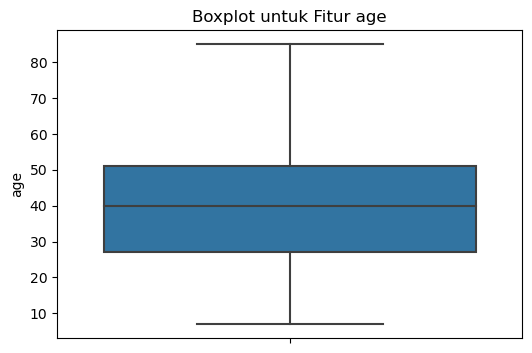

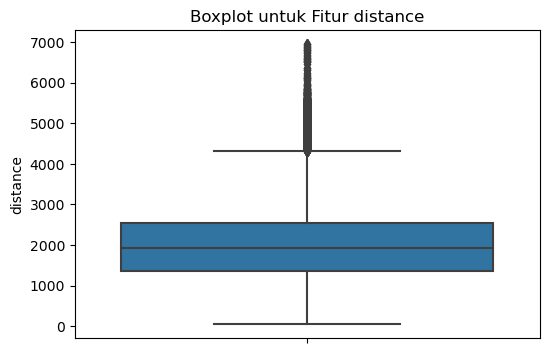

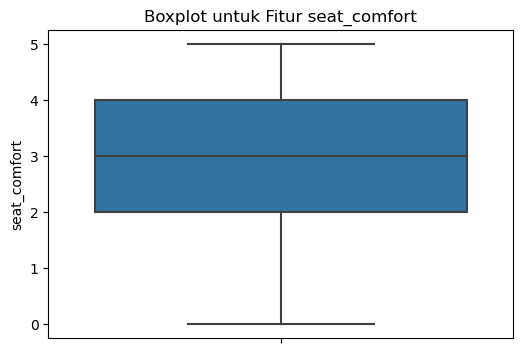

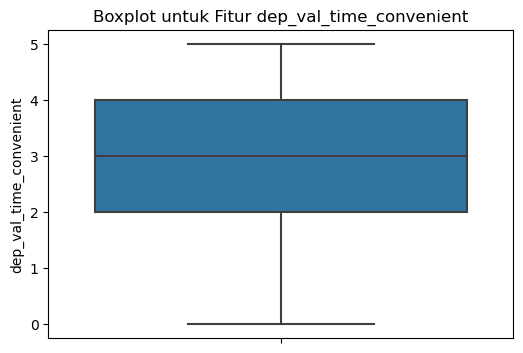

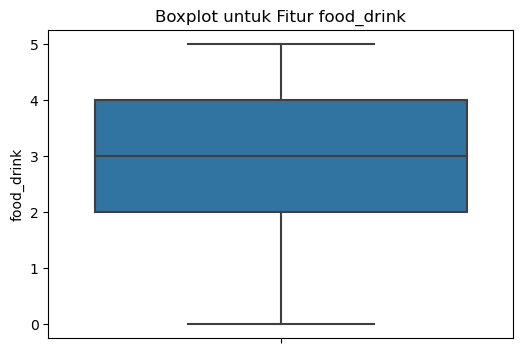

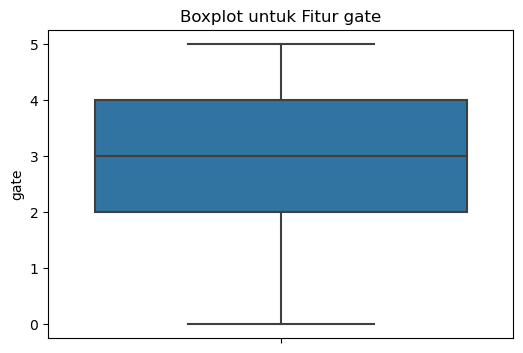

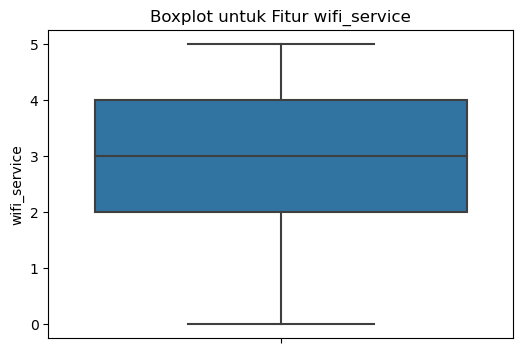

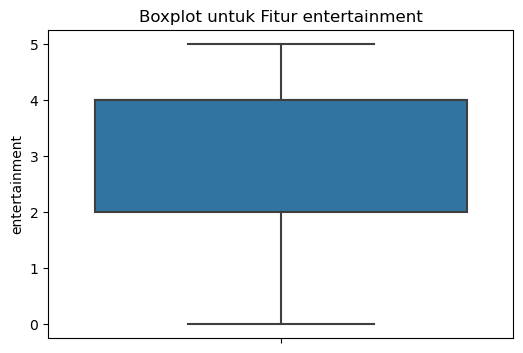

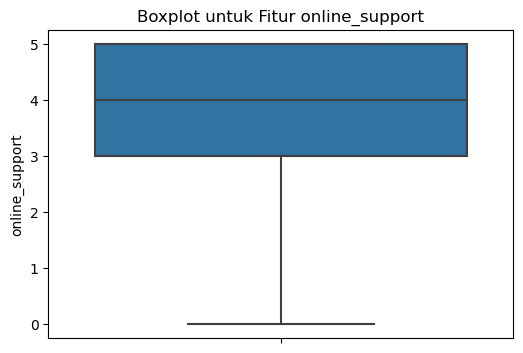

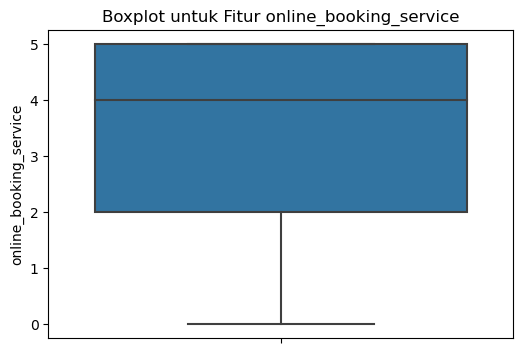

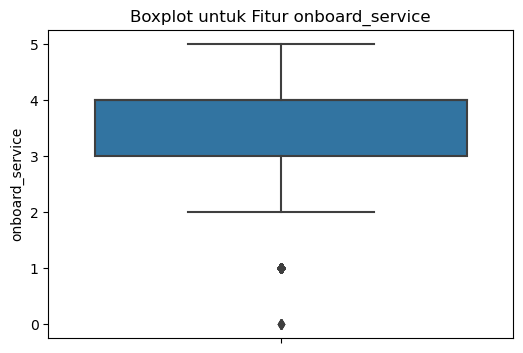

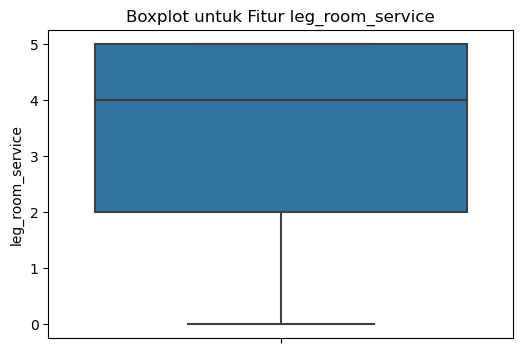

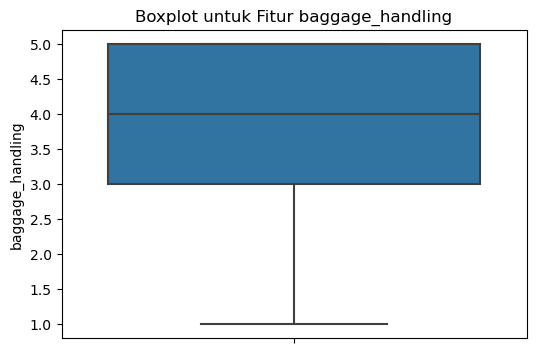

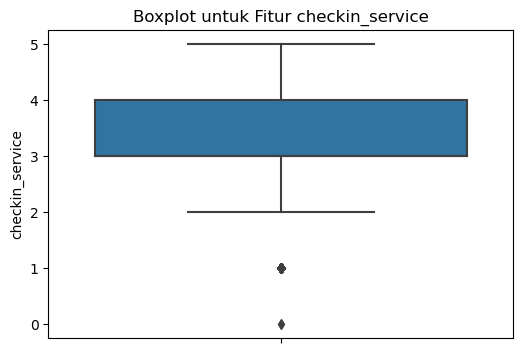

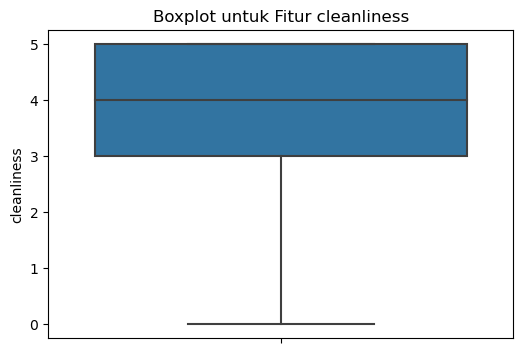

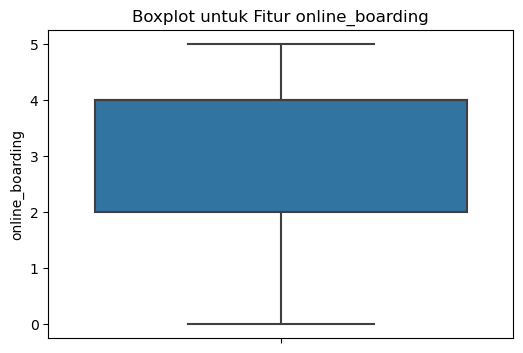

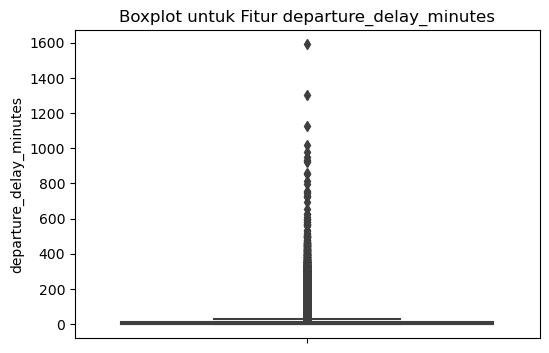

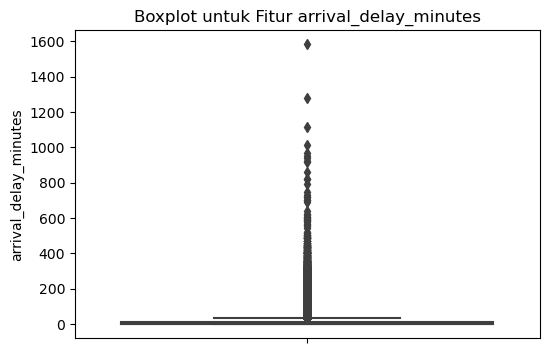

In [13]:
# Daftar kolom yang ingin Anda periksa boxplot-nya
fitur = ['age', 'distance', 'seat_comfort', 'dep_val_time_convenient', 'food_drink', 'gate', 'wifi_service', 'entertainment', 'online_support', 'online_booking_service', 'onboard_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding', 'departure_delay_minutes', 'arrival_delay_minutes']

# Loop melalui kolom terpilih
for col in fitur:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot untuk Fitur {col}')
    plt.ylabel(col)
    plt.show()

In [14]:
def count_outliers_iqr(data, column, threshold=1.5):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    return outliers.sum()

# Misalkan kolom 'umur' adalah kolom yang ingin dihitung banyaknya outlier
kolom = 'distance'

# Hitung banyaknya outlier pada kolom 'umur' menggunakan metode IQR
banyak_outlier = count_outliers_iqr(df, kolom)
print("Banyaknya outlier pada kolom '{}' adalah: {}".format(kolom, banyak_outlier))

Banyaknya outlier pada kolom 'distance' adalah: 2575


In [15]:
def count_outliers_iqr(data, column, threshold=1.5):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    return outliers.sum()

# Misalkan kolom 'umur' adalah kolom yang ingin dihitung banyaknya outlier
kolom = 'arrival_delay_minutes'

# Hitung banyaknya outlier pada kolom 'umur' menggunakan metode IQR
banyak_outlier = count_outliers_iqr(df, kolom)
print("Banyaknya outlier pada kolom '{}' adalah: {}".format(kolom, banyak_outlier))

Banyaknya outlier pada kolom 'arrival_delay_minutes' adalah: 17492


In [16]:
def count_outliers_iqr(data, column, threshold=1.5):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    return outliers.sum()

# Misalkan kolom 'umur' adalah kolom yang ingin dihitung banyaknya outlier
kolom = 'departure_delay_minutes'

# Hitung banyaknya outlier pada kolom 'umur' menggunakan metode IQR
banyak_outlier = count_outliers_iqr(df, kolom)
print("Banyaknya outlier pada kolom '{}' adalah: {}".format(kolom, banyak_outlier))

Banyaknya outlier pada kolom 'departure_delay_minutes' adalah: 17970


> <span style="font-size:16px;">  <b> Dari hasil deteksi outlier di atas dapat diketahui:
    >*    > <span style="font-size:16px;">  <b>Outlier kita deteksi dengan boxplot dan IQR
    >*    > <span style="font-size:16px;">  <b>Terdapat Outlier yang cukup banyak pada 3 kolom yaitu distance, arrival delay, dan departure delay
    >*    > <span style="font-size:16px;">  <b>Outlier tersebut kita pertahankan karena jika dihapus atau diisi tidak merepresentasikan data yang sebenarnya

# EDA

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,129487.0,39.428761,15.117597,7.0,27.0,40.0,51.0,85.0
distance,129487.0,1981.008974,1026.884131,50.0,1359.0,1924.0,2543.0,6951.0
seat_comfort,129487.0,2.838586,1.392873,0.0,2.0,3.0,4.0,5.0
dep_val_time_convenient,129487.0,2.990277,1.527183,0.0,2.0,3.0,4.0,5.0
food_drink,129487.0,2.852024,1.443587,0.0,2.0,3.0,4.0,5.0
gate,129487.0,2.990377,1.305917,0.0,2.0,3.0,4.0,5.0
wifi_service,129487.0,3.249160,1.318765,0.0,2.0,3.0,4.0,5.0
entertainment,129487.0,3.383745,1.345959,0.0,2.0,4.0,4.0,5.0
online_support,129487.0,3.519967,1.306326,0.0,3.0,4.0,5.0,5.0
online_booking_service,129487.0,3.472171,1.305573,0.0,2.0,4.0,5.0,5.0


In [18]:
df.describe(exclude = ['float', 'int64']).T

,count,unique,top,freq
satisfaction,129487,2,satisfied,70882
gender,129487,2,Female,65703
customer_type,129487,2,Loyal Customer,105773
travel_type,129487,2,Business travel,89445
class,129487,3,Business,61990


> <span style="font-size:16px;">  <b> Dari hasil analisis di atas dapat diketahui:
    >*    > <span style="font-size:16px;">  <b>Rata-rata keterlambatan/delay berangkat dan tiba pesawat adalah 15 menit dengan standar deviasinya 38
    >*    > <span style="font-size:16px;">  <b>Median dari keterlambatannya/delay adalah 0, artinya 50% penerbangan dalam data ini tidak mengalami keterlambatan/delay
    >*    > <span style="font-size:16px;">  <b>Jumlah penumpang wanita lebih dari 65899

## Visualisasi

### Membagi Data Sesuai Tipenya

In [19]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  5
********************************************************************************
Categorical variables column name: ['satisfaction', 'gender', 'customer_type', 'travel_type', 'class']


In [20]:
num_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(num_features))
print('*'*80)
print('Numerical Variables Column: ',num_features)

Number of numerical variables:  18
********************************************************************************
Numerical Variables Column:  ['age', 'distance', 'seat_comfort', 'dep_val_time_convenient', 'food_drink', 'gate', 'wifi_service', 'entertainment', 'online_support', 'online_booking_service', 'onboard_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding', 'departure_delay_minutes', 'arrival_delay_minutes']


### Visualisasi Data Jenis Kategori

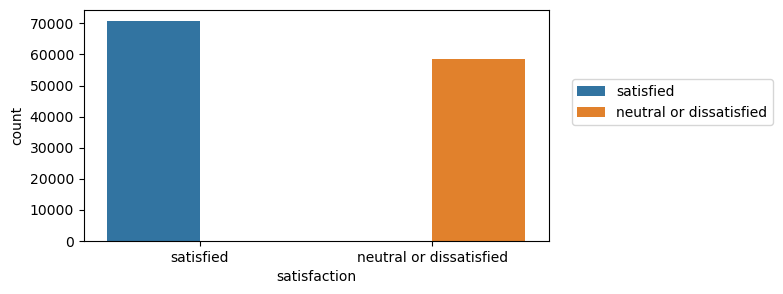

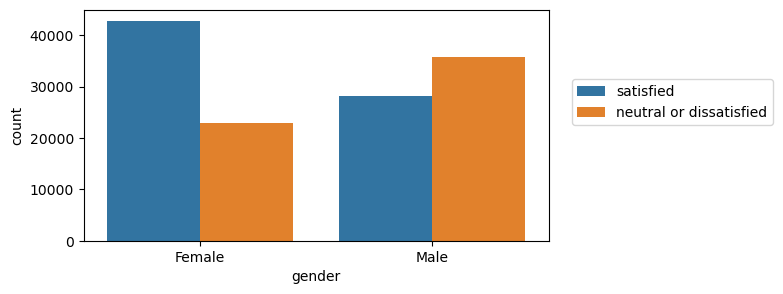

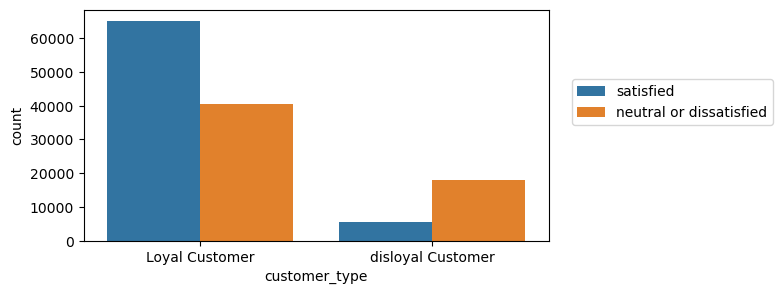

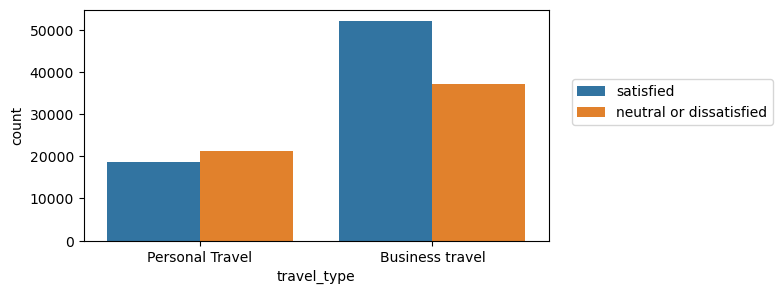

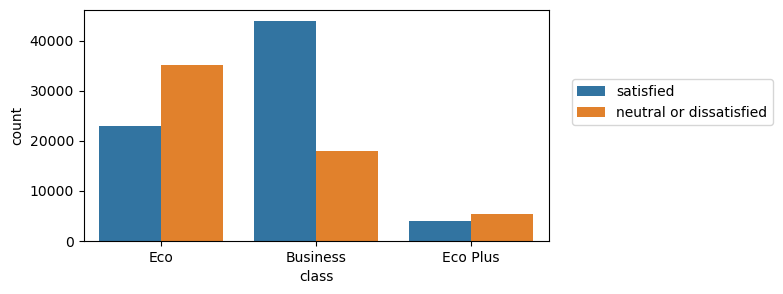

In [21]:
for col in cat_features:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=df,x=col,hue ='satisfaction')
    plt.legend(loc=(1.05,0.5))

In [22]:
for cols in cat_features:
        cat_group = df.groupby(cols)['satisfaction'].describe()
        percent = 100 *(cat_group['freq']/cat_group['count'])
        print('*'*70)
        print("Insights from '{}' data".format(cols))
        print('*'*70)
        for i in range(0,(len(cat_group))):
            print('{} from {} are {}'.format(round(percent[i],2),percent.index[i], cat_group['top'][i]))
        print('*'*70)

**********************************************************************
Insights from 'satisfaction' data
**********************************************************************
100.0 from neutral or dissatisfied are neutral or dissatisfied
100.0 from satisfied are satisfied
**********************************************************************
**********************************************************************
Insights from 'gender' data
**********************************************************************
65.14 from Female are satisfied
55.97 from Male are neutral or dissatisfied
**********************************************************************
**********************************************************************
Insights from 'customer_type' data
**********************************************************************
61.64 from Loyal Customer are satisfied
76.01 from disloyal Customer are neutral or dissatisfied
****************************************************************

> <span style="font-size:16px;">  <b>Dari hasil visualisasi dan insight di atas, dapat diketahui bahwa:
     >*    > <span style="font-size:16px;">  <b>Jenis kelamin tidak terlalu penting bagi penilaian satisfaction, karena baik pria maupun wanita sepertinya sama-sama khawatir dengan masalah yang sama.</b>
 >*   > <span style="font-size:16px;">   <b>Jumlah keloyalan pelanggan pada maskapai ini cukup tinggi dan mereka banyak yang puas, meski begitu hampir setengah dari pelanggan yang loyal juga tidak merasa puas. Pihak maskapai perlu melakukan evaluasi pada hal ini.</b>
 >*  > <span style="font-size:16px;">   <b>Para pelanggan yang melakukan perjalanan bisnis lebih puas dibandingkan dengan perjalanan pribadi, namun tingkat tidak kepuasan, baik pada perjalanan personal maupun pribadi, keduanya juga sangat tinggi.
       >*    > <span style="font-size:16px;">  <b>Penumpang yang berada dalam kelas bisnis sepertinya banyak yang lebih puas dibandingkan dengan mereka yang berada di kelas ekonomi.</b>

### Visualisasi Data Jenis Numerikal

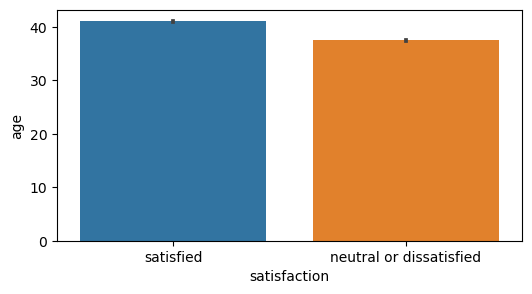

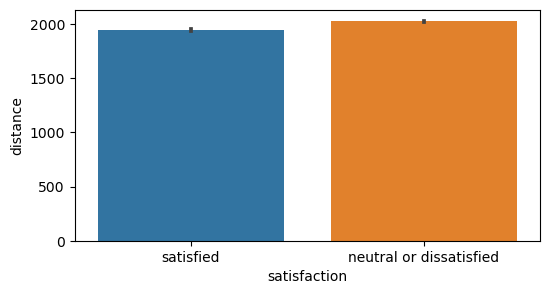

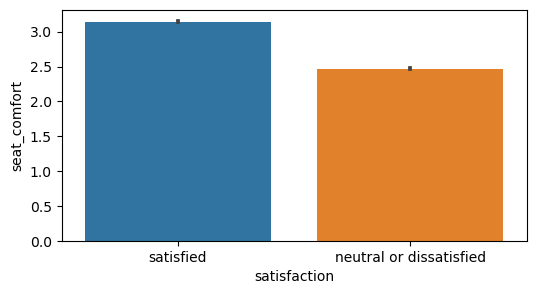

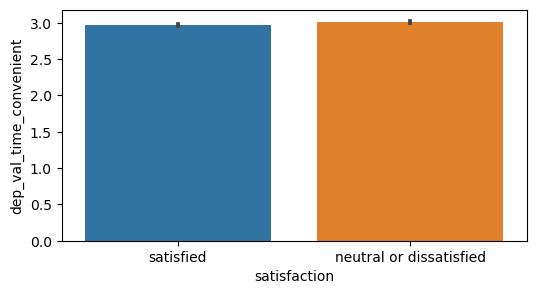

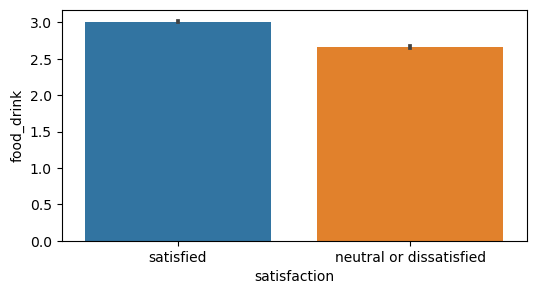

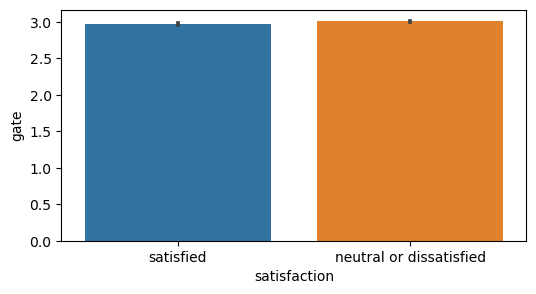

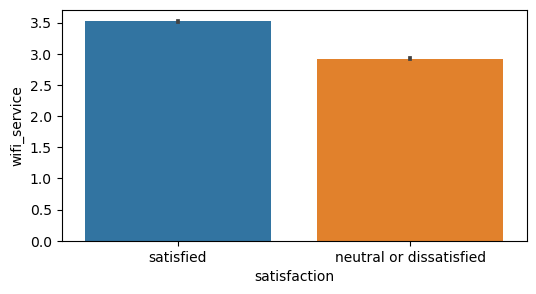

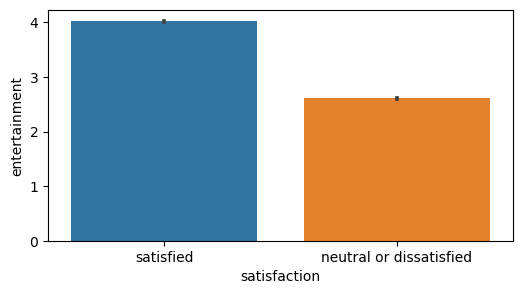

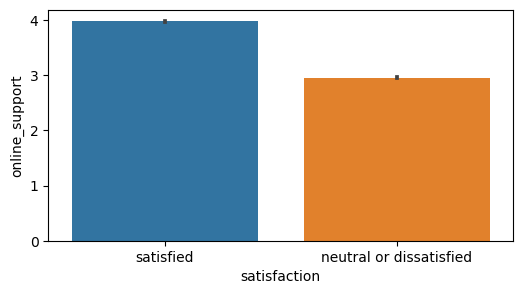

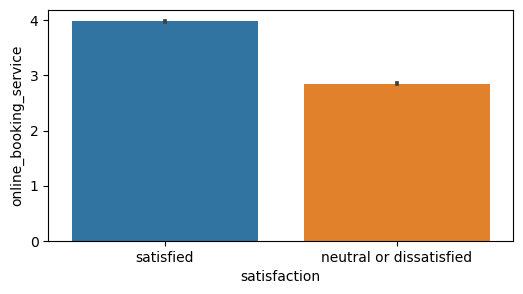

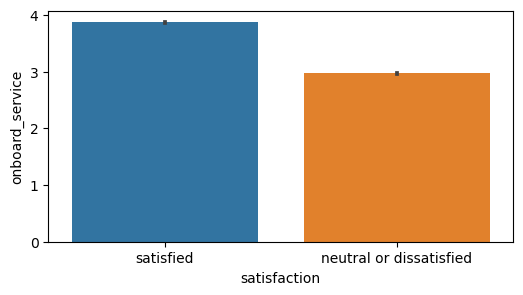

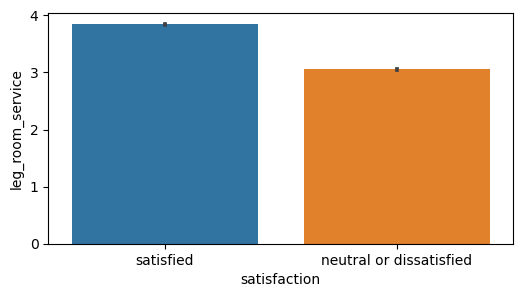

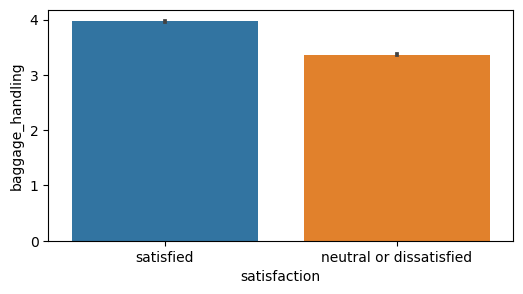

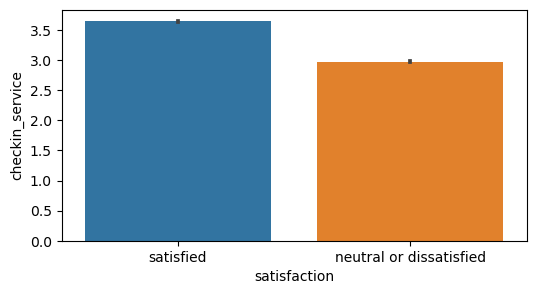

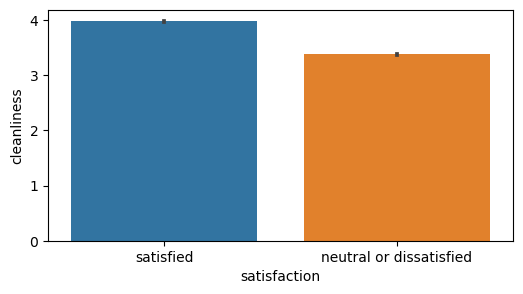

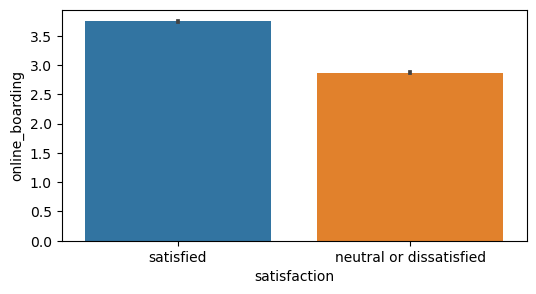

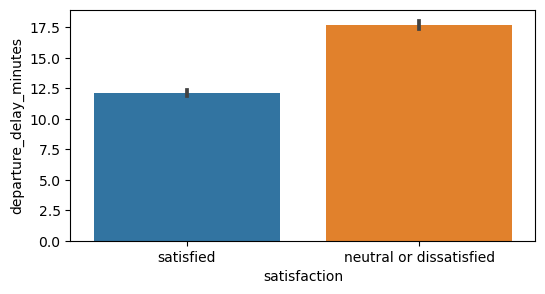

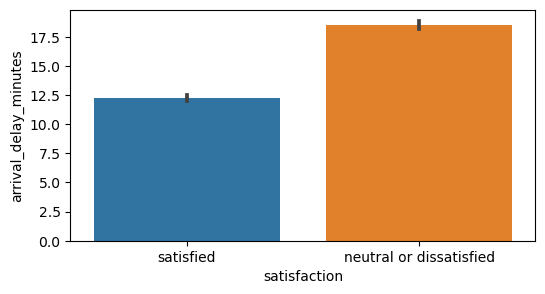

In [23]:
for col in num_features:
    plt.figure(figsize=(6,3))
    sns.barplot(data=df,x='satisfaction',y=col)

> <span style="font-size:16px;">  <b>Dari hasil plot di atas, dapat diketahui umur (age) dan lokasi gerbang (Gate location) tidak terlalu mempengaruhi kepuasan penerbangan. Jenis kelamin (gender) dan Waktu kedatangan/keberangkatan yang sesuai juga tidak terlalu memberi banyak informasi seperti di plot sebelumnya. Maka dari itu, fitur-fitur ini akan dibuang

In [24]:
df.drop(['age','gender','gate','dep_val_time_convenient'], axis=1, inplace=True)

In [25]:
df.shape

(129487, 19)

In [26]:
df.dtypes

satisfaction                object
customer_type               object
travel_type                 object
class                       object
distance                     int64
seat_comfort                 int64
food_drink                   int64
wifi_service                 int64
entertainment                int64
online_support               int64
online_booking_service       int64
onboard_service              int64
leg_room_service             int64
baggage_handling             int64
checkin_service              int64
cleanliness                  int64
online_boarding              int64
departure_delay_minutes      int64
arrival_delay_minutes      float64
dtype: object

### Linearitas

<Axes: xlabel='arrival_delay_minutes', ylabel='departure_delay_minutes'>

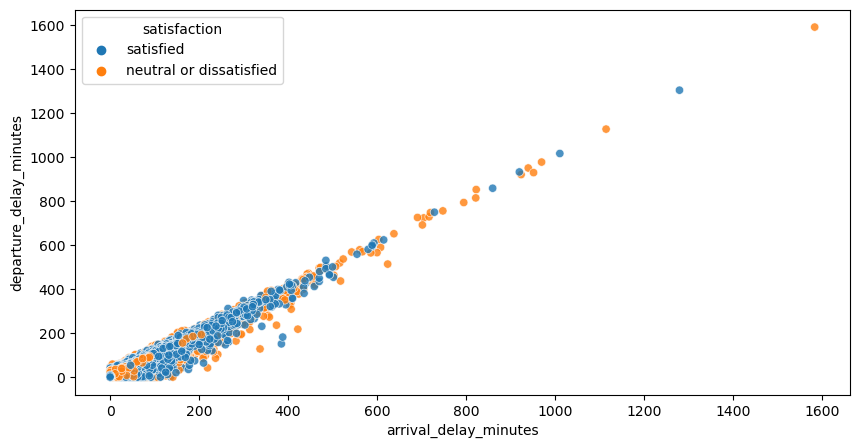

In [27]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df,x='arrival_delay_minutes',y='departure_delay_minutes',hue='satisfaction', alpha=0.8)

> <span style="font-size:16px;">  <b>Penundaan kedatangan dan keberangkatan memiliki hubungan yang linear.

(0.0, 1000.0)

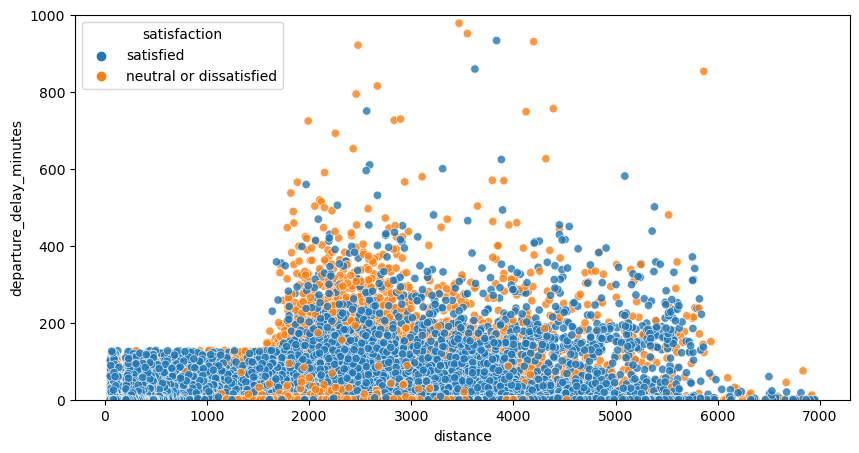

In [28]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df,x='distance',y='departure_delay_minutes',hue='satisfaction', alpha=0.8)
plt.ylim(0,1000)

> <span style="font-size:16px;">  <b>Yang menjadi hal terpenting di sini adalah semakin jauh jarak penerbangan, kebanyakan penumpang tidak keberatan dengan penundaan sebentar dalam keberangkatan, sedangkan penumpang yang memiliki penerbangan jarak dekat tidak terlalu puas. Dari hal ini bisa diketahui bahwa penundaan keberangkatan bukan menjadi faktor kepuasan

> <span style="font-size:16px;">  <b>Sebelumnya sudah disebutkan bahwa penumpang yang berada di kelas bisnis lebih puas dibandingkan di kelas ekonomi, mari analisis hal tersebut

In [29]:
df.groupby('class').mean()

C:\Users\meisy\AppData\Local\Temp\ipykernel_4044\2397007441.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('class').mean()


,distance,seat_comfort,food_drink,wifi_service,entertainment,online_support,online_booking_service,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_minutes,arrival_delay_minutes
class,,,,,,,,,,,,,,,
Business,2157.533134,2.789595,2.926472,3.335425,3.732263,3.770915,3.653444,3.693080,3.665107,3.853331,3.525730,3.855235,3.490466,14.233054,14.491805
Eco,1823.742691,2.875269,2.777156,3.168367,3.057797,3.289003,3.305332,3.270196,3.328389,3.565222,3.186985,3.582325,3.227197,15.017052,15.615465
Eco Plus,1788.803412,2.935075,2.823881,3.179638,3.100000,3.292537,3.307889,3.166631,3.280490,3.459062,3.070682,3.484435,3.217697,15.039979,15.803198


> <span style="font-size:16px;">  <b>Dari hasil di atas, dapat diketahui bahwa rata-rata penumpang dengan kelas bisnis memberikan rating yang tinggi terhadap seluruh pelayanan dibandingkan kelas ekonomi dan ekonomi plus. Maka kelas perjalanan (class) berpengaruh besar dalam menentukan kepuasan penumpang

# Mapping

In [30]:
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
df['customer_type'] = df['customer_type'].map({'Loyal Customer':1, 'disloyal Customer':0})
df['travel_type'] = df['travel_type'].map({'Personal Travel':0, 'Business travel':1})
df['class'] = df['class'].map({'Eco':0, 'Eco Plus':1, 'Business':2})

# Membuat Model Algoritma

In [31]:
#Membagi data menjadi variabel target dan atribut
target = 'satisfaction'
X = df.drop('satisfaction', axis=1)
y = df[target]

# Rasio 90:10

In [99]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [100]:
#Scaling fitur dengan metode pipeline, dan scaler standar
pipeline = Pipeline([
            ('std_scaler',StandardScaler()),
                    ])
scaled_X_train = pipeline.fit_transform(X_train)
scaled_X_test = pipeline.transform(X_test)

In [101]:
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 116538
Jumlah data testing: 12949


## XGBoost

In [102]:
model_xgb = XGBClassifier(random_state =2)
model_xgb.fit(scaled_X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, ...)

In [103]:
pred_xgb = model_xgb.predict(scaled_X_test)
accuracy_score(y_test,pred_xgb)

0.9497258475557958

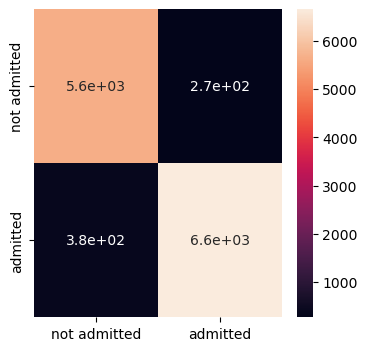

<Figure size 500x500 with 0 Axes>

In [104]:
#Rasio 90:10
conf_matrix = confusion_matrix(y_test, pred_xgb)
sns.heatmap(conf_matrix, annot=True, xticklabels=['not admitted', 'admitted'], yticklabels=['not admitted', 'admitted'])
plt.figure(figsize=(5,5))
plt.show()

In [105]:
# Menghitung metrik evaluasi
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Mencetak metrik evaluasi
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

TP: 6650
FP: 274
TN: 5648
FN: 377
Accuracy: 0.9497258475557958
Precision: 0.9604274985557482
Recall: 0.9463497936530525
F1 Score: 0.95333667837431


In [106]:
err_train = np.mean(y_train != model_xgb.predict(X_train))
err_test  = np.mean(y_test  != model_xgb.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

Training sample error:  0.4520671368995521
Error on the test sample:  0.45733261255695423


## SVM

In [107]:
model_svm = SVC(random_state =2)
model_svm.fit(scaled_X_train,y_train)

SVC(random_state=2)

In [108]:
pred_svm = model_svm.predict(scaled_X_test)
accuracy_score(y_test,pred_svm)

0.9406131747625299

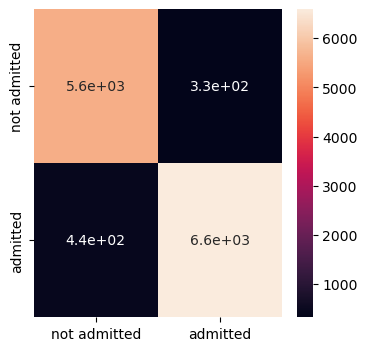

<Figure size 500x500 with 0 Axes>

In [109]:
#Rasio 90:10
conf_matrix = confusion_matrix(y_test, pred_svm)
sns.heatmap(conf_matrix, annot=True, xticklabels=['not admitted', 'admitted'], yticklabels=['not admitted', 'admitted'])
plt.figure(figsize=(5,5))
plt.show()

In [110]:
# Menghitung metrik evaluasi
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Mencetak metrik evaluasi
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

TP: 6587
FP: 329
TN: 5593
FN: 440
Accuracy: 0.9406131747625299
Precision: 0.9524291497975709
Recall: 0.9373843745552868
F1 Score: 0.9448468765688876


In [111]:
err_train = np.mean(y_train != model_svm.predict(X_train))
err_test  = np.mean(y_test  != model_svm.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

C:\Users\meisy\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\meisy\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Training sample error:  0.4520671368995521
Error on the test sample:  0.45733261255695423


## Random Forest

In [112]:
model_rf = RandomForestClassifier(random_state =2)
model_rf.fit(scaled_X_train,y_train)

RandomForestClassifier(random_state=2)

In [113]:
pred_rf = model_rf.predict(scaled_X_test)
accuracy_score(y_test,pred_rf)

0.9508842381651093

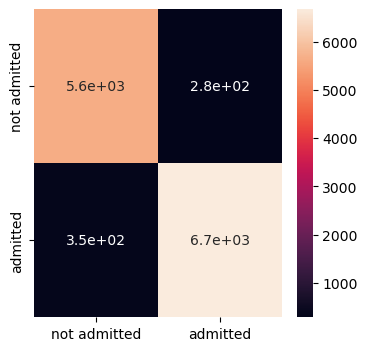

<Figure size 500x500 with 0 Axes>

In [114]:
#Rasio 90:10
conf_matrix = confusion_matrix(y_test, pred_rf)
sns.heatmap(conf_matrix, annot=True, xticklabels=['not admitted', 'admitted'], yticklabels=['not admitted', 'admitted'])
plt.figure(figsize=(5,5))
plt.show()

In [115]:
# Menghitung metrik evaluasi
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Mencetak metrik evaluasi
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

TP: 6676
FP: 285
TN: 5637
FN: 351
Accuracy: 0.9508842381651093
Precision: 0.9590576066657089
Recall: 0.9500498078838765
F1 Score: 0.9545324563911924


In [116]:
err_train = np.mean(y_train != model_rf.predict(X_train))
err_test  = np.mean(y_test  != model_rf.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

C:\Users\meisy\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\meisy\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Training sample error:  0.4519984897629958
Error on the test sample:  0.4572553865163333


In [117]:
# Rasio 90:10
print("XGBOOST :", accuracy_score(y_test,pred_xgb))
print("SVM :", accuracy_score(y_test,pred_svm))
print("Random Forest :", accuracy_score(y_test,pred_rf))

XGBOOST : 0.9497258475557958
SVM : 0.9406131747625299
Random Forest : 0.9508842381651093


# Rasio 80:20

In [118]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
#Scaling fitur dengan metode pipeline, dan scaler standar
pipeline = Pipeline([
            ('std_scaler',StandardScaler()),
                    ])
scaled_X_train = pipeline.fit_transform(X_train)
scaled_X_test = pipeline.transform(X_test)

In [120]:
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 103589
Jumlah data testing: 25898


## XGBoost

In [121]:
model_xgb = XGBClassifier(random_state =2)
model_xgb.fit(scaled_X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, ...)

In [122]:
pred_xgb = model_xgb.predict(scaled_X_test)
accuracy_score(y_test,pred_xgb)

0.951115916286972

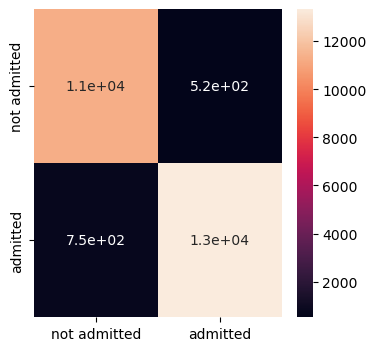

<Figure size 500x500 with 0 Axes>

In [123]:
#Rasio 80:20
conf_matrix = confusion_matrix(y_test, pred_xgb)
sns.heatmap(conf_matrix, annot=True, xticklabels=['not admitted', 'admitted'], yticklabels=['not admitted', 'admitted'])
plt.figure(figsize=(5,5))
plt.show()

In [124]:
# Menghitung metrik evaluasi
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Mencetak metrik evaluasi
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

TP: 13329
FP: 518
TN: 11303
FN: 748
Accuracy: 0.951115916286972
Precision: 0.962591174983751
Recall: 0.9468636783405555
F1 Score: 0.9546626557799743


In [125]:
err_train = np.mean(y_train != model_xgb.predict(X_train))
err_test  = np.mean(y_test  != model_xgb.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

Training sample error:  0.45163096467771674
Error on the test sample:  0.4564445130898139


### Feature Importance

entertainment: 0.3964584767818451
seat_comfort: 0.13088694214820862
customer_type: 0.07929284125566483
online_booking_service: 0.07049394398927689
class: 0.041308820247650146
travel_type: 0.039463337510824203
checkin_service: 0.03234986960887909
online_boarding: 0.03106897883117199
online_support: 0.029797013849020004
food_drink: 0.024572933092713356
leg_room_service: 0.024479830637574196
onboard_service: 0.023614173755049706
baggage_handling: 0.02278539165854454
cleanliness: 0.017145197838544846
arrival_delay_minutes: 0.012166867032647133
wifi_service: 0.011433177627623081
distance: 0.007983206771314144
departure_delay_minutes: 0.004699028097093105


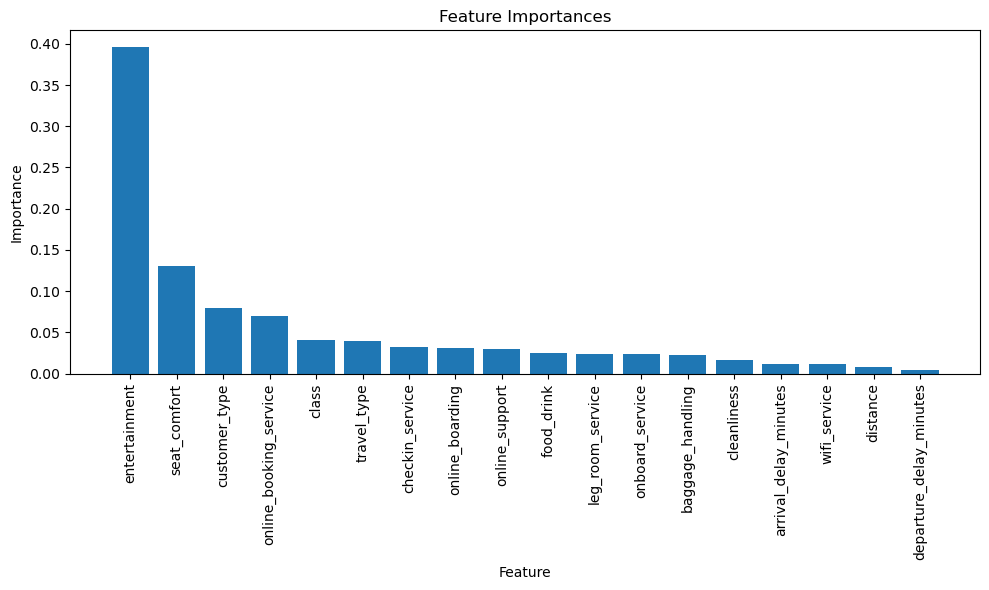

In [126]:
# Get feature importances from the trained XGBOOST model
feature_importances = model_xgb.feature_importances_
feature_names = np.array(X_train.columns)

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[indices]
sorted_feature_names = feature_names[indices]

# Print the feature importances in descending order
for feature_name, importance in zip(sorted_feature_names, sorted_feature_importances):
    print(f"{feature_name}: {importance}")

# Plot the feature importances as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), sorted_feature_importances)
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

## SVM

In [127]:
model_svm = SVC(random_state =2)
model_svm.fit(scaled_X_train,y_train)

SVC(random_state=2)

In [128]:
pred_svm = model_svm.predict(scaled_X_test)
accuracy_score(y_test,pred_svm)

0.9386052977063866

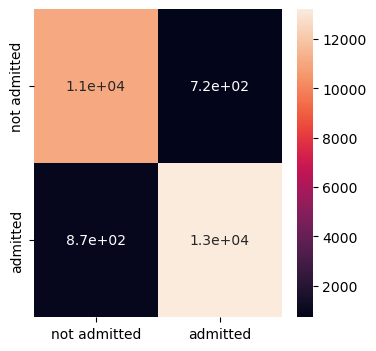

<Figure size 500x500 with 0 Axes>

In [129]:
#Rasio 80:20
conf_matrix = confusion_matrix(y_test, pred_svm)
sns.heatmap(conf_matrix, annot=True, xticklabels=['not admitted', 'admitted'], yticklabels=['not admitted', 'admitted'])
plt.figure(figsize=(5,5))
plt.show()

In [130]:
# Menghitung metrik evaluasi
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Mencetak metrik evaluasi
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

TP: 13205
FP: 718
TN: 11103
FN: 872
Accuracy: 0.9386052977063866
Precision: 0.9484306543130072
Recall: 0.9380549833061022
F1 Score: 0.9432142857142857


In [131]:
err_train = np.mean(y_train != model_svm.predict(X_train))
err_test  = np.mean(y_test  != model_svm.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

C:\Users\meisy\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\meisy\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Training sample error:  0.45163096467771674
Error on the test sample:  0.4564445130898139


## Random Forest

In [132]:
model_rf = RandomForestClassifier(random_state =2)
model_rf.fit(scaled_X_train,y_train)

RandomForestClassifier(random_state=2)

In [133]:
pred_rf = model_rf.predict(scaled_X_test)
accuracy_score(y_test,pred_rf)

0.9494941694339332

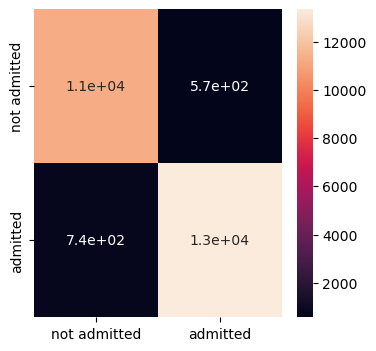

<Figure size 500x500 with 0 Axes>

In [134]:
#Rasio 80:20
conf_matrix = confusion_matrix(y_test, pred_rf)
sns.heatmap(conf_matrix, annot=True, xticklabels=['not admitted', 'admitted'], yticklabels=['not admitted', 'admitted'])
plt.figure(figsize=(5,5))
plt.show()

In [135]:
# Menghitung metrik evaluasi
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Mencetak metrik evaluasi
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

TP: 13338
FP: 569
TN: 11252
FN: 739
Accuracy: 0.9494941694339332
Precision: 0.9590853527000791
Recall: 0.9475030191091852
F1 Score: 0.9532590051457976


In [136]:
err_train = np.mean(y_train != model_rf.predict(X_train))
err_test  = np.mean(y_test  != model_rf.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

C:\Users\meisy\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\meisy\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Training sample error:  0.45163096467771674
Error on the test sample:  0.4564445130898139


In [137]:
# Rasio 80:20
print("XGBOOST :", accuracy_score(y_test,pred_xgb))
print("SVM :", accuracy_score(y_test,pred_svm))
print("Random Forest :", accuracy_score(y_test,pred_rf))

XGBOOST : 0.951115916286972
SVM : 0.9386052977063866
Random Forest : 0.9494941694339332


# Rasio 70:30

In [138]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [139]:
#Scaling fitur dengan metode pipeline, dan scaler standar
pipeline = Pipeline([
            ('std_scaler',StandardScaler()),
                    ])
scaled_X_train = pipeline.fit_transform(X_train)
scaled_X_test = pipeline.transform(X_test)

In [140]:
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 90640
Jumlah data testing: 38847


## XGBoost

In [141]:
model_xgb = XGBClassifier(random_state =2)
model_xgb.fit(scaled_X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, ...)

In [142]:
pred_xgb = model_xgb.predict(scaled_X_test)
accuracy_score(y_test,pred_xgb)

0.9481298427162973

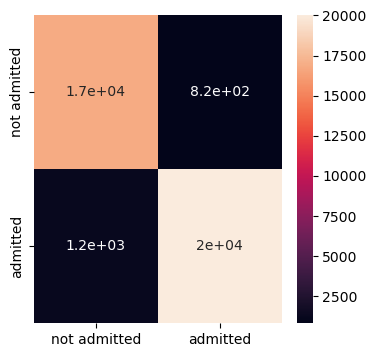

<Figure size 500x500 with 0 Axes>

In [143]:
#Rasio 70:30
conf_matrix = confusion_matrix(y_test, pred_xgb)
sns.heatmap(conf_matrix, annot=True, xticklabels=['not admitted', 'admitted'], yticklabels=['not admitted', 'admitted'])
plt.figure(figsize=(5,5))
plt.show()

In [144]:
# Menghitung metrik evaluasi
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Mencetak metrik evaluasi
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

TP: 20012
FP: 819
TN: 16820
FN: 1196
Accuracy: 0.9481298427162973
Precision: 0.960683596562815
Recall: 0.9436061863447756
F1 Score: 0.9520683175146886


In [145]:
err_train = np.mean(y_train != model_xgb.predict(X_train))
err_test  = np.mean(y_test  != model_xgb.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

Training sample error:  0.45196381288614296
Error on the test sample:  0.4540633768373362


## SVM

In [146]:
model_svm = SVC(random_state =2)
model_svm.fit(scaled_X_train,y_train)

SVC(random_state=2)

In [147]:
pred_svm = model_svm.predict(scaled_X_test)
accuracy_score(y_test,pred_svm)

0.938116199449121

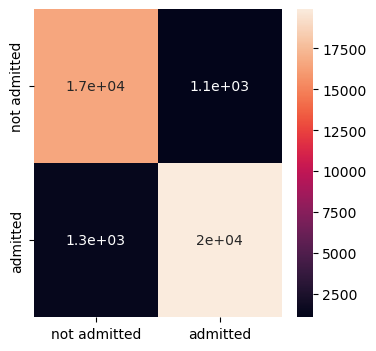

<Figure size 500x500 with 0 Axes>

In [148]:
#Rasio 70:30
conf_matrix = confusion_matrix(y_test, pred_svm)
sns.heatmap(conf_matrix, annot=True, xticklabels=['not admitted', 'admitted'], yticklabels=['not admitted', 'admitted'])
plt.figure(figsize=(5,5))
plt.show()

In [149]:
# Menghitung metrik evaluasi
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Mencetak metrik evaluasi
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

TP: 19888
FP: 1084
TN: 16555
FN: 1320
Accuracy: 0.938116199449121
Precision: 0.9483120350944116
Recall: 0.9377593360995851
F1 Score: 0.9430061640587957


In [150]:
err_train = np.mean(y_train != model_svm.predict(X_train))
err_test  = np.mean(y_test  != model_svm.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

C:\Users\meisy\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\meisy\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Training sample error:  0.45196381288614296
Error on the test sample:  0.4540633768373362


## Random Forest

In [151]:
model_rf = RandomForestClassifier(random_state =2)
model_rf.fit(scaled_X_train,y_train)

RandomForestClassifier(random_state=2)

In [152]:
pred_rf = model_rf.predict(scaled_X_test)
accuracy_score(y_test,pred_rf)

0.948799135068345

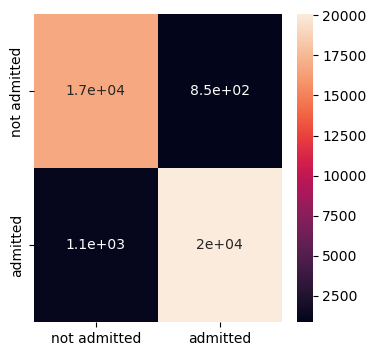

<Figure size 500x500 with 0 Axes>

In [153]:
#Rasio 70:30
conf_matrix = confusion_matrix(y_test, pred_rf)
sns.heatmap(conf_matrix, annot=True, xticklabels=['not admitted', 'admitted'], yticklabels=['not admitted', 'admitted'])
plt.figure(figsize=(5,5))
plt.show()

In [154]:
# Menghitung metrik evaluasi
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Mencetak metrik evaluasi
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

TP: 20067
FP: 848
TN: 16791
FN: 1141
Accuracy: 0.948799135068345
Precision: 0.9594549366483385
Recall: 0.9461995473406262
F1 Score: 0.9527811409443772


In [155]:
err_train = np.mean(y_train != model_svm.predict(X_train))
err_test  = np.mean(y_test  != model_svm.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

C:\Users\meisy\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\meisy\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Training sample error:  0.45196381288614296
Error on the test sample:  0.4540633768373362


In [156]:
# Rasio 70:30
print("XGBOOST :", accuracy_score(y_test,pred_xgb))
print("SVM :", accuracy_score(y_test,pred_svm))
print("Random Forest :", accuracy_score(y_test,pred_rf))

XGBOOST : 0.9481298427162973
SVM : 0.938116199449121
Random Forest : 0.948799135068345


> <span style="font-size:16px;">  <b>Dari hasil di atas, dapat diketahui bahwa model terbaik adalah XGBOOST dengan akurasi tertinggi 95,1% dengan rasio 80:20. Selain itu, dikarenakan nilai precision dan recallnya juga cukup tinggi, maka model ini sudah sangat bagus sehingga tidak perlu dilakukan resampling.